<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0.4_n250.csv',
 'data_multi_delta_0.4_n120.csv',
 'data_multi_delta_0.4_n60.csv',
 'data_multi_delta_0.4_n30.csv',
 'data_multi_delta_0.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.570248,-1.400206,49.170042,50.801060,-1.631018
1,0.0,1.0,70.404646,-0.979320,79.425326,80.027526,-0.602200
2,0.0,2.0,49.606809,-3.347821,56.258988,59.653484,-3.394496
3,0.0,3.0,42.464330,0.099117,52.563447,52.656547,-0.093100
4,0.0,4.0,45.221988,1.132536,56.354524,55.358012,0.996512
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.223577,-0.142762,31.080815,32.166439,-1.085625
59996,999.0,56.0,38.620139,0.582923,49.203062,49.366173,-0.163111
59997,999.0,57.0,75.256167,-4.189130,81.067037,85.587691,-4.520654
59998,999.0,58.0,83.647391,-0.300663,93.346728,93.883974,-0.537247


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.570248,-1.400206,49.170042,50.801060,-1.631018
1,0.0,1.0,70.404646,-0.979320,79.425326,80.027526,-0.602200
2,0.0,2.0,49.606809,-3.347821,56.258988,59.653484,-3.394496
3,0.0,3.0,42.464330,0.099117,52.563447,52.656547,-0.093100
4,0.0,4.0,45.221988,1.132536,56.354524,55.358012,0.996512
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.223577,-0.142762,31.080815,32.166439,-1.085625
59996,999.0,56.0,38.620139,0.582923,49.203062,49.366173,-0.163111
59997,999.0,57.0,75.256167,-4.189130,81.067037,85.587691,-4.520654
59998,999.0,58.0,83.647391,-0.300663,93.346728,93.883974,-0.537247


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    40.570248 -1.400206  49.170042  50.801060 -1.631018
      1.0    70.404646 -0.979320  79.425326  80.027526 -0.602200
      2.0    49.606809 -3.347821  56.258988  59.653484 -3.394496
      3.0    42.464330  0.099117  52.563447  52.656547 -0.093100
      4.0    45.221988  1.132536  56.354524  55.358012  0.996512
...                ...       ...        ...        ...       ...
999.0 55.0   21.223577 -0.142762  31.080815  32.166439 -1.085625
      56.0   38.620139  0.582923  49.203062  49.366173 -0.163111
      57.0   75.256167 -4.189130  81.067037  85.587691 -4.520654
      58.0   83.647391 -0.300663  93.346728  93.883974 -0.537247
      59.0   59.687376  0.317744  70.005120  70.195049 -0.189929

[60000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    40.570248 -1.400206  49.170042  50.801060 -1.631018
      1.0    70.404646 -0.979320  79.425326  80.027526 -0.602200
      2.0    49.606809 -3.347821  56.258988  59.653484 -3.394496
      3.0    42.464330  0.099117  52.563447  52.656547 -0.093100
      4.0    45.221988  1.132536  56.354524  55.358012  0.996512
...                ...       ...        ...        ...       ...
999.0 55.0   21.223577 -0.142762  31.080815  32.166439 -1.085625
      56.0   38.620139  0.582923  49.203062  49.366173 -0.163111
      57.0   75.256167 -4.189130  81.067037  85.587691 -4.520654
      58.0   83.647391 -0.300663  93.346728  93.883974 -0.537247
      59.0   59.687376  0.317744  70.005120  70.195049 -0.189929

[60000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,40.570248,-1.400206,49.170042,50.801060,-1.631018
1,0.0,1.0,70.404646,-0.979320,79.425326,80.027526,-0.602200
2,0.0,2.0,49.606809,-3.347821,56.258988,59.653484,-3.394496
3,0.0,3.0,42.464330,0.099117,52.563447,52.656547,-0.093100
4,0.0,4.0,45.221988,1.132536,56.354524,55.358012,0.996512
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.223577,-0.142762,31.080815,32.166439,-1.085625
59996,999.0,56.0,38.620139,0.582923,49.203062,49.366173,-0.163111
59997,999.0,57.0,75.256167,-4.189130,81.067037,85.587691,-4.520654
59998,999.0,58.0,83.647391,-0.300663,93.346728,93.883974,-0.537247


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    40.570248 -1.400206  49.170042  50.801060 -1.631018
      1.0    70.404646 -0.979320  79.425326  80.027526 -0.602200
      2.0    49.606809 -3.347821  56.258988  59.653484 -3.394496
      3.0    42.464330  0.099117  52.563447  52.656547 -0.093100
      4.0    45.221988  1.132536  56.354524  55.358012  0.996512
...                ...       ...        ...        ...       ...
999.0 55.0   21.223577 -0.142762  31.080815  32.166439 -1.085625
      56.0   38.620139  0.582923  49.203062  49.366173 -0.163111
      57.0   75.256167 -4.189130  81.067037  85.587691 -4.520654
      58.0   83.647391 -0.300663  93.346728  93.883974 -0.537247
      59.0   59.687376  0.317744  70.005120  70.195049 -0.189929

[60000 rows x 5 columns]

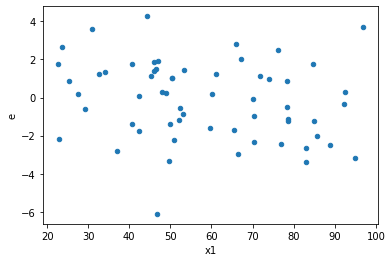

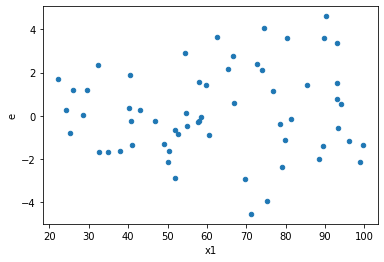

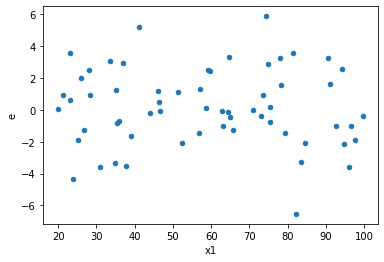

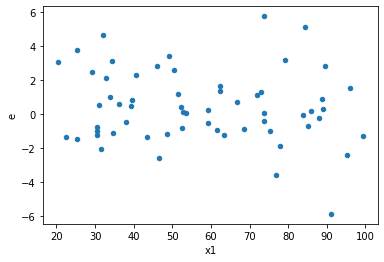

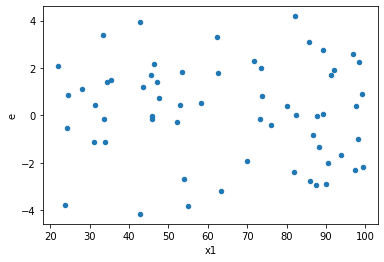

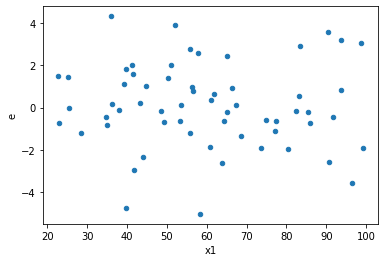

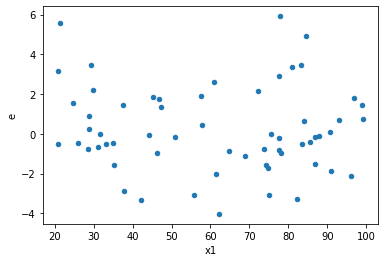

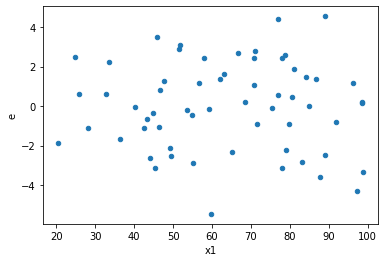

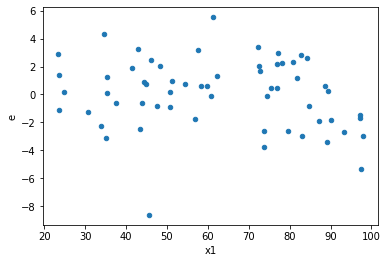

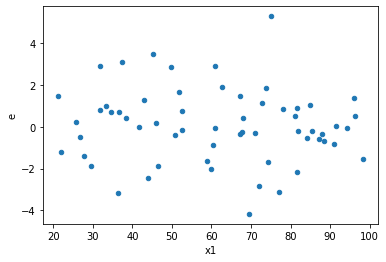

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,23.0,23.0,47.51088594135584,147.08449528665605,2.065690693102428,6.394978055941567,3.095806200461237,0.008933040250035162,0.9955334798749824,0.004466520125017581,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,136.7414181784995,166.23149506764378,5.945279051239108,7.22745630728886,1.2156630908321322,0.643461801901926,0.678269099049037,0.321730900950963,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,92.95386915408989,143.00255660951404,4.041472571916952,6.217502461283219,1.5384250049070933,0.30872773011362775,0.8456361349431861,0.15436386505681388,Reject001=1 : Homoscedasticity
4.0,23.0,23.0,78.01934544101724,104.32034547727827,3.392145453957271,4.535667194664272,1.337108698971906,0.49151797857079504,0.7542410107146025,0.24575898928539752,Reject001=1 : Homoscedasticity
6.0,23.0,23.0,81.76683358843147,125.79168113241762,3.555079721236151,5.469203527496418,1.5384193763156175,0.3087318083176491,0.8456340958411754,0.15436590415882456,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,88.93269761138058,127.24274822548158,3.866639026581764,5.532293401107895,1.4307757623805457,0.3967386387731455,0.8016306806134272,0.19836931938657276,Reject001=1 : Homoscedasticity
10.0,23.0,23.0,79.25050937287025,151.7050897685134,3.445674320559576,6.595873468196235,1.914247504135872,0.12672926943628826,0.9366353652818559,0.06336463471814413,Reject001=1 : Homoscedasticity
11.0,23.0,23.0,99.50554265718647,191.39581327777682,4.326327941616803,8.321557099033775,1.923468865821555,0.12399022004184124,0.9380048899790794,0.06199511002092062,Reject001=1 : Homoscedasticity
12.0,23.0,23.0,63.11160833129194,148.58773631968913,2.7439829709257366,6.460336361725615,2.3543645970755036,0.04532801470055636,0.9773359926497218,0.02266400735027818,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,23.0,23.0,121.70487466481258,96.27103319256943,5.29151628977446,4.185697095329106,0.7910203552463244,0.5785908736944096,Reject001=1 : Homoscedasticity
1.0,23.0,23.0,47.51088594135584,147.08449528665605,2.065690693102428,6.394978055941567,3.095806200461237,0.008933040250035162,Reject001=0 : Heteroscedasticity
2.0,23.0,23.0,136.7414181784995,166.23149506764378,5.945279051239108,7.22745630728886,1.2156630908321322,0.643461801901926,Reject001=1 : Homoscedasticity
3.0,23.0,23.0,92.95386915408989,143.00255660951404,4.041472571916952,6.217502461283219,1.5384250049070933,0.30872773011362775,Reject001=1 : Homoscedasticity
4.0,23.0,23.0,78.01934544101724,104.32034547727827,3.392145453957271,4.535667194664272,1.337108698971906,0.49151797857079504,Reject001=1 : Homoscedasticity
5.0,23.0,23.0,92.75738594249539,84.70540167720826,4.032929823586756,3.682843551182968,0.9131930661534712,0.8294866827107213,Reject001=1 : Homoscedasticity
6.0,23.0,23.0,81.76683358843147,125.79168113241762,3.555079721236151,5.469203527496418,1.5384193763156175,0.3087318083176491,Reject001=1 : Homoscedasticity
7.0,23.0,23.0,88.93269761138058,127.24274822548158,3.866639026581764,5.532293401107895,1.4307757623805457,0.3967386387731455,Reject001=1 : Homoscedasticity
8.0,23.0,23.0,156.26531916324095,89.70231137275235,6.794144311445258,3.9001004944674933,0.5740385125316626,0.1907428968213102,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      958
Reject001=0 : Heteroscedasticity     42
Name: Result_test, dtype: int64